In [4]:
# Ensure you have the dependencies for this notebook
%pip install -r req.txt --user

  Using cached mlflow-2.4.1-py3-none-any.whl (18.1 MB)
  Using cached azureml_mlflow-1.51.0-py3-none-any.whl (814 kB)
  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
  Using cached databricks_cli-0.17.7-py3-none-any.whl
  Using cached GitPython-3.1.31-py3-none-any.whl (184 kB)
  Using cached alembic-1.11.1-py3-none-any.whl (224 kB)
  Using cached pyarrow-12.0.1-cp38-cp38-win_amd64.whl (21.5 MB)
  Using cached waitress-2.1.2-py3-none-any.whl (57 kB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached docker-6.1.3-py3-none-any.whl (148 kB)
  Using cached jsonpickle-3.0.1-py2.py3-none-any.whl (40 kB)
  Using cached azure_storage_blob-12.13.0-py3-none-any.whl (377 kB)
  Using cached mlflow_skinny-2.4.1-py3-none-any.whl (4.3 MB)
  Using cached Mako-1.2.4-py3-none-any.whl (78 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
  Using cached pywin32-306-cp38-cp38-win_amd64.whl (9.4 MB)
  Using cached gitdb-4.0.10-py3-none-any.whl (62 kB)
  Using 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-proj

In [5]:
import warnings

warnings.simplefilter("ignore")

In [6]:
pip install mlflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
#Configuring the experiment
import mlflow
mlflow.set_experiment(experiment_name="heart-condition-classifier")

2023/06/14 15:37:43 INFO mlflow.tracking.fluent: Experiment with name 'heart-condition-classifier' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/Users/LENOVO/Desktop/xgboost-with-mlflowLog/mlruns/736217185099158391', creation_time=1686746263314, experiment_id='736217185099158391', last_update_time=1686746263314, lifecycle_stage='active', name='heart-condition-classifier', tags={}>

In [8]:
import pandas as pd

In [9]:
file_url = "https://azuremlexampledata.blob.core.windows.net/data/heart-disease-uci/data/heart.csv"
df = pd.read_csv(file_url)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int8   
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), int8(1)
memory usage: 31.2 KB


In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
# conver category into encoding
df["thal"] = df["thal"].astype("category").cat.codes

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,2,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,4,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [16]:
df["thal"].unique()

array([2, 3, 4, 0, 1], dtype=int8)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop("target", axis=1), df["target"], test_size=0.3
)

In [19]:
# Training a model
# We are going to use autologging capabilities in MLflow to track parameters and metrics:
mlflow.xgboost.autolog()

In [20]:
# let create a simple classifier
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

In [21]:
# run the mlflow
run = mlflow.start_run()

In [22]:
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

2023/06/14 16:23:10 WARNING mlflow.xgboost: Unable to log dataset information to MLflow Tracking.XGBoost version must be >= 1.7.0
2023/06/14 16:23:10 WARNING mlflow.xgboost: Unable to log dataset information to MLflow Tracking.XGBoost version must be >= 1.7.0


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [23]:
# calculate recall metric for the heart desease prediction because the important is to reduce type two error (predicted negative but its positive)
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [25]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))

Accuracy: 74.73%
Recall: 60.00%


In [26]:
# Exploring the expriment with MLFlow
mlflow.end_run()

In [28]:
run.info.run_id

'ee4d00d8880242df8753065f27dba3be'

In [29]:
# To see what's has been logged, we can query the run again:
mlflow.get_run(run.info.run_id)

<Run: data=<RunData: metrics={'accuracy_score_X_test': 0.7472527472527473,
 'recall_score_X_test': 0.6,
 'validation_0-logloss': 0.8244304791178265}, params={'base_score': 'None',
 'booster': 'None',
 'colsample_bylevel': 'None',
 'colsample_bynode': 'None',
 'colsample_bytree': 'None',
 'custom_metric': 'None',
 'early_stopping_rounds': 'None',
 'eval_metric': 'logloss',
 'gamma': 'None',
 'gpu_id': 'None',
 'grow_policy': 'None',
 'interaction_constraints': 'None',
 'learning_rate': 'None',
 'max_bin': 'None',
 'max_cat_to_onehot': 'None',
 'max_delta_step': 'None',
 'max_depth': 'None',
 'max_leaves': 'None',
 'maximize': 'None',
 'min_child_weight': 'None',
 'monotone_constraints': 'None',
 'n_jobs': 'None',
 'num_boost_round': '100',
 'num_parallel_tree': 'None',
 'objective': 'binary:logistic',
 'predictor': 'None',
 'random_state': 'None',
 'reg_alpha': 'None',
 'reg_lambda': 'None',
 'sampling_method': 'None',
 'scale_pos_weight': 'None',
 'subsample': 'None',
 'tree_method': '

In [30]:
# Let's explore the parameters that got logged:
pd.DataFrame(data=[run.data.params], index=["Value"]).T

,Value


In [31]:
pd.DataFrame(data=[run.data.metrics], index=["Value"]).T

,Value


In [32]:
# Let's explore artifacts that got logged in the run. This requires to use the MLflow client:

client = mlflow.tracking.MlflowClient()
client.list_artifacts(run_id=run.info.run_id)

[<FileInfo: file_size=188, is_dir=False, path='feature_importance_weight.json'>,
 <FileInfo: file_size=23164, is_dir=False, path='feature_importance_weight.png'>,
 <FileInfo: file_size=151, is_dir=False, path='metric_info.json'>,
 <FileInfo: file_size=None, is_dir=True, path='model'>]

In [33]:
file_path = mlflow.artifacts.download_artifacts(
    run_id=run.info.run_id, artifact_path="feature_importance_weight.png"
)

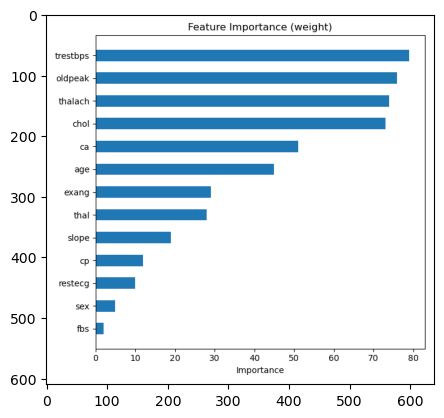

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as img

image = img.imread(file_path)
plt.imshow(image)
plt.show()

In [35]:
# autolog has also logged the model for us, let's try to get it back
classifier = mlflow.xgboost.load_model(f"runs:/{run.info.run_id}/model")

In [36]:
type(classifier)

xgboost.sklearn.XGBClassifier

In [ ]:
classifier.predict(X_test)

In [37]:
# You can get prediction back from the model

classifier.predict(X_test)

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1])

## Logging models with preprocessing
As can be seen, MLflow automatically logs models for you, but some times you need to log a different model, specially when you are doing preprocessing. In this example we did some categorical encoding, so our model right now expects the values of the column thal to be integers, not strings.

To make that requirement go away, we can create a Pipeline object with Scikit-Learn and log that model instead of the one automatically logged for us. Let's see how:

In [39]:
# Reload the dataset
df = pd.read_csv(file_url)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop("target", axis=1), df["target"], test_size=0.3
)

## Using an encoder
First let's use a OrdinalEncoder instead of the categorical types

In [41]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

# We only need to transform the column thal. A convenient way to do this is by applying a ColumnTransformer to that column, the remaining columns will be sent directly to the model:

In [45]:
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier

encoder = ColumnTransformer(
    [
        (
            "cat_encoding",
            OrdinalEncoder(
                categories="auto",
            
            ),
            ["thal"],
        )
    ],
    remainder="passthrough",
)

In [46]:
model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [48]:
pipeline = Pipeline(steps=[("encoding", encoder), ("model", model)])

In [49]:
pipeline

Pipeline(steps=[('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_encoding',
                                                  OrdinalEncoder(),
                                                  ['thal'])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               gamma=None, g...olicy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=None,
        

We can log this model in our run. Since this is a Scikit-Learn object, we will log it using such flavor instead of xgboost. Let's create a new complete run so we can see the difference.

### Signatures
One extra thing we need to take care of is the expected signature of the model. Signatures are use by MLflow to know what type of inputs are expected for a given model. This allows the model builder to be explicit about which types are being expected. In the first model we logged, all inputs needed to be numeric, including the column thal. However, our new pipeline can encode this values automatically so we can take thal values in string format.

In [50]:
from mlflow.models import infer_signature

signature = infer_signature(X_test, y_test)

In [51]:
signature

inputs: 
  ['age': long, 'sex': long, 'cp': long, 'trestbps': long, 'chol': long, 'fbs': long, 'restecg': long, 'thalach': long, 'exang': long, 'oldpeak': double, 'slope': long, 'ca': long, 'thal': string]
outputs: 
  ['target': long]

### Logging the pipeline model
Now, it's time to to fit our entire pipeline and log it inside the run.

In [52]:
with mlflow.start_run() as run:
    pipeline.fit(X_train, y_train)
    mlflow.sklearn.log_model(pipeline, artifact_path="pipeline", signature=signature)

2023/06/14 16:51:55 WARNING mlflow.xgboost: Unable to log dataset information to MLflow Tracking.XGBoost version must be >= 1.7.0


In [53]:
pipeline_model = mlflow.sklearn.load_model(f"runs:/{run.info.run_id}/pipeline")

In [54]:
type(pipeline_model)

sklearn.pipeline.Pipeline

In [55]:
pipeline_model.predict(X_test)

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0])